<a href="https://colab.research.google.com/github/vivekmehendiratta/SCRY/blob/master/scry_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
data = pd.read_csv('AssignmentData.csv')
data.shape

(18182, 10)

In [169]:
data.head()

,Id,Date,Site_Type,Site,URL,Author_name,Title,Content,Sentiment,Country
0,210540-102609514645,30/06/18,Twitter,Twitter,http://twitter.com/SethSkeller/status/10133113...,Seth Keller,RT @mattrob_3: . @dexcom sponsor your boy ☀️,RT @mattrob_3: . @dexcom sponsor your boy ☀️,neutral,France
1,210540-102611998758,30/06/18,Social network,Facebook,NaN,Anonymous user,Dexcom,Another thing. kaiser DM never calls back. You...,neutral,United States
2,210540-102611998754,30/06/18,Social network,Facebook,NaN,Anonymous user,Dexcom,Don’t wait for Kaiser DM. Call your Endo and a...,neutral,United States
3,210540-102611998745,30/06/18,Social network,Facebook,NaN,Anonymous user,Dexcom,My son has been wearing the G6 for 3 days now!,neutral,United States
4,210540-102611998682,30/06/18,Social network,Facebook,NaN,Anonymous user,Dexcom,It’s a lot better. But the 5 is great too.,positive,United States


In [170]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')

In [171]:
data['Title'] = data['Title'].replace(np.nan, '', regex=True)
data['Content'] = data['Content'].replace(np.nan, '', regex=True)

# Trend Analysis

In [172]:
trend_data = data.groupby('Date')['Id'].count()

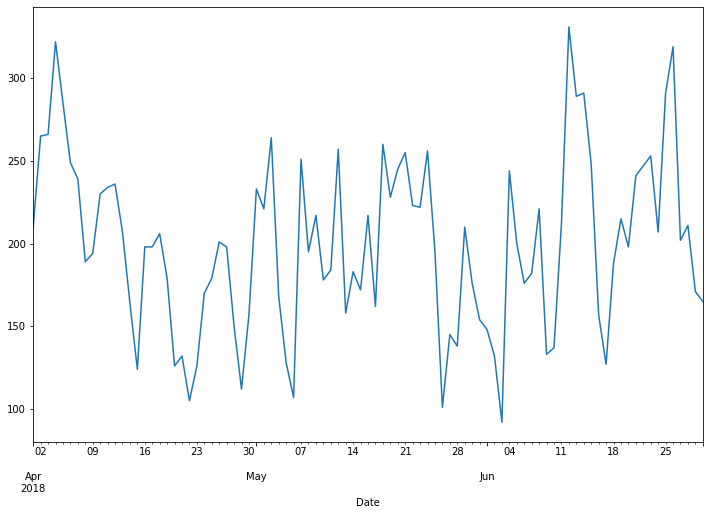

In [173]:
plt.figure(figsize=(12,8))
trend_data.plot()
plt.show()

In [174]:
Q1 = np.percentile(trend_data, 25)
Q3 = np.percentile(trend_data, 75)
Q1, Q3

(163.0, 237.5)

In [175]:
IQR = Q3-Q1
upper_fence = Q3 + 1.5*IQR
lower_fence = Q1 - 1.5*IQR
upper_fence, lower_fence

(349.25, 51.25)

In [176]:
sum(trend_data > upper_fence)

0

In [177]:
upper_fence = Q3 + 1*IQR
lower_fence = Q1 - 1*IQR
upper_fence, lower_fence

(312.0, 88.5)

In [178]:
sum(trend_data > upper_fence)

3

In [179]:
sum(trend_data < lower_fence)

0

In [180]:
upper_fence = Q3 + 0.75*IQR
lower_fence = Q1 - 0.75*IQR
upper_fence, lower_fence

(293.375, 107.125)

In [181]:
peak_dates = trend_data[trend_data > upper_fence].index
low_dates = trend_data[trend_data < lower_fence].index

In [182]:
peak_dates

DatetimeIndex(['2018-04-04', '2018-06-12', '2018-06-26'], dtype='datetime64[ns]', name='Date', freq=None)

In [183]:
peak_data = data[data['Date'].isin(peak_dates)][['Date','Title', 'Content']]
low_data = data[data['Date'].isin(low_dates)][['Date', 'Title', 'Content']]

In [184]:
peak_data

,Date,Title,Content
749,2018-06-26,"Tresiba, Dexcom, and Dawn Phenomenon (Day 2) |...",What is your experience with tresiba is it rea...
750,2018-06-26,Beyond Type 1,Seems easier to wear the dexcom than worry abo...
751,2018-06-26,@DiabetesMedia @Cyn_LA1 I tweeted this: .@dexc...,@DiabetesMedia @Cyn_LA1 I tweeted this: .@dexc...
752,2018-06-26,,"For the next week, I join Ava in the power pat..."
753,2018-06-26,"Tresiba, Dexcom, and Dawn Phenomenon (Day 2) |...",MotoMatt thank you my man!! Hope to chat more
...,...,...,...
17436,2018-04-04,Dexcom G6 approved in the USA,Tim has written an interesting article about t...
17437,2018-04-04,"""It’s so refreshing to have a project engageme...","""It’s so refreshing to have a project engageme..."
17438,2018-04-04,Current $TNDM insulin pump with $DXCM G5 requi...,Current $TNDM insulin pump with $DXCM G5 requi...
17439,2018-04-04,"RT @lifeforachild: Thanks #Dexcom, #SpareARose...","RT @lifeforachild: Thanks #Dexcom, #SpareARose..."


In [185]:
import string
def test_trans(s):
    return s.translate(str.maketrans('','',string.punctuation))

In [186]:
peak_data['text'] = peak_data['Title'].astype(str) + ' ' + peak_data['Content']
low_data['text'] = low_data['Title'].astype(str) + ' ' + low_data['Content']

In [187]:
peak_data['filtered_text'] = peak_data['text'].apply(lambda x:test_trans(x))

In [188]:
peak_data['filtered_text']

749      Tresiba Dexcom and Dawn Phenomenon Day 2  Diab...
750      Beyond Type 1 Seems easier to wear the dexcom ...
751      DiabetesMedia CynLA1 I tweeted this dexcom Scr...
752       For the next week I join Ava in the power pat...
753      Tresiba Dexcom and Dawn Phenomenon Day 2  Diab...
                               ...                        
17436    Dexcom G6 approved in the USA Tim has written ...
17437    It’s so refreshing to have a project engagemen...
17438    Current TNDM insulin pump with DXCM G5 require...
17439    RT lifeforachild Thanks Dexcom SpareARose and ...
17440     Day 3 of doyouyoga doyoumeditate April yoga c...
Name: filtered_text, Length: 972, dtype: object

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(3, 5), max_features = 200)

In [190]:
x = peak_data[peak_data['Date'] == '2018-04-04']
X = vectorizer.fit_transform(x['filtered_text'])

In [191]:
feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

In [192]:
n = 50
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['zach interviewed kevin sayer president',
       'dexcom wins fda approval', 'g6 but here we are', 'g6 but here we',
       'g6 but here', 'excited about the g6 but', 'excited about the g6',
       'excited about the', 'didnt think we could get',
       'didnt think we could', 'didnt think we',
       'dexcom wins fda approval for', 'dexcom wins fda',
       'zach interviewed kevin sayer', 'dexcom g6 will shut off',
       'dexcom g6 will shut', 'dexcom g6 will be acetaminophen',
       'dexcom g6 will be', 'dexcom g6 will', 'dexcom g6 system we didnt',
       'dexcom g6 system we', 'dexcom g6 system', 'dexcom g5 on',
       'dexcom about the new dexcom', 'g6 system we',
       'g6 system we didnt', 'g6 system we didnt think', 'g6 will be',
       'interviewed kevin sayer president and',
       'interviewed kevin sayer president', 'interviewed kevin sayer',
       'intern zach interviewed kevin sayer',
       'intern zach interviewed kevin', 'intern zach interviewed',
       'im

Peak Date : 2018-04-04

dexcom wins fda approval, zach interviewed kevin sayer president

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(5, 5), stop_words = 'english', max_features = 200)

In [194]:
x = peak_data[peak_data['Date'] == '2018-06-12']
X = vectorizer.fit_transform(x['filtered_text'])

In [195]:
feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

In [196]:
n = 50
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['dxcm raised overweight jpmorgan chase',
       'dexcom dxcm raised overweight jpmorgan',
       'wtw yndx http42stockscom adnt alny', 'g5 cgm finally able use',
       'fingerprick calibrations accuracy g5 paracetamol',
       'finally allows dexcom users access',
       'experience dexcom g6 pos used', 'excited did wish knew got',
       'exas fang grub hcsg icui', 'enter new bf meter value',
       'encouragementwe use dexcom amd omnipodthings',
       'effect readings individual sensors transmitters',
       'east midlands needed dip bedside', 'dxcm eri ew exas fang',
       'dexcom users access phone sharing',
       'dont know really overly unusual', 'doing 5pm tune dexcom live',
       'doesnt effect readings individual sensors',
       'dip bedside stash glucotabs 130', 'did wish knew got dexcom',
       'did miss pricing rest public',
       'diagn t1d sharing sorrowour family',
       'diabetes device read blood sugar',
       'dexcom want read httpsseemycgmcom20180611

Peak date : 2018-06-12

UK allows Dexcom G6

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(3, 3), stop_words = 'english', max_features = 200)

x = peak_data[peak_data['Date'] == '2018-06-26']
X = vectorizer.fit_transform(x['filtered_text'])

feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

n = 50
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['diabetic koala gets', 'quincy san diego', 'gets help dexcom',
       'san diego zoo', 'zoo wears dexcom', 'end year diabetessport',
       'finger pricks people', 'fewer finger pricks', 'feel little upset',
       'feel dexcom g6', 'fallabel say access', 'fabulous adventure love',
       'express disappointed sad', 'expect g6 week',
       'domlittlewood start clipperrace', 'draining stomach 260618',
       'freestyle libre sensor', 'domlittlewood fabulous adventure',
       'domlittlewood clipperrace diabetesuk', 'disappointed sad damn',
       'disability trying hide', 'diego zoo wears', 'diego zoo gets',
       'diabetic hide pump', 'diabetesuk dexcom race',
       'freedom fewer finger', 'g5 medtrum a6',
       'diabetessport t1d cysticfibrosis', 'g6 continuous glucose',
       'just starting weeks', 'insulet dexcom positioned',
       'inserting dexcom sensor', 'impressions using new',
       'im t1d refuse', 'humans afford probably',
       'httpstwittercompbluenovemberst

peak date : 2018-06-26
Dexcom installed in san diego zoo

In [198]:
low_dates

DatetimeIndex(['2018-04-22', '2018-05-06', '2018-05-26', '2018-06-03'], dtype='datetime64[ns]', name='Date', freq=None)

In [199]:
low_data['filtered_text'] = low_data['text'].apply(lambda x:test_trans(x))

In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 5), stop_words = 'english', max_features = 200)

x = low_data[low_data['Date'] == '2018-04-22']
X = vectorizer.fit_transform(x['filtered_text'])

feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

n = 50
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['best', 'good', 'run', 'morning', 'dexcom', 'xdrip', 'gbdoc',
       'glucose levels thanks', 'glucose levels', 'glucose', 'getting',
       'gbdoc doc type1diabetes httpdiabeticshamblescom20180422alarming',
       'gbdoc doc type1diabetes', 'gbdoc doc', 'g5',
       'glucose levels thanks help dexcom', 'flat lining 12 hours blood',
       'flat lining 12 hours', 'flat lining 12', 'flat lining', 'flat',
       'fitness', 'earth', 'dxcm', 'dont', 'does',
       'glucose levels thanks help', 'glucose monitoring',
       'doc type1diabetes', 'glucose monitoring included', 'insulin',
       'included morning run rulet1d t1dtribe',
       'included morning run rulet1d', 'included morning run',
       'included morning', 'included',
       'httpdiabeticshamblescom20180422alarming',
       'hours blood glucose levels thanks', 'hours blood glucose levels',
       'hours blood glucose', 'hours blood', 'hours',
       'help dexcom continuous glucose monitoring',
       'help dexcom contin

Low date : 2018-04-22

Something to do with Type 1 diabetes and flat lining

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 5), stop_words = 'english', max_features = 200)

x = low_data[low_data['Date'] == '2018-05-06']
X = vectorizer.fit_transform(x['filtered_text'])

feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

n = 50
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['people', 'rt', 'dexcom', 'g5 starter kit gogluco goodies',
       'gogluco goodies attendees', 'gogluco goodies', 'gogluco',
       'getting',
       'gbdoc doc pwd httpswwweventbritecoukesport1daysharingstrategiesforsuccessinsportsforpeoplewithtype1diabetesbypeoplewithtickets44320827789utmmediumdiscoveryutmcampaignsocialutmcontentattendeeshareaffestwutmsourcetwutmtermlisting',
       'gbdoc doc pwd', 'gbdoc doc', 'gbdoc', 'g6', 'years',
       'gogluco goodies attendees tdfcdiabetes', 'g5 starter kit',
       'g5 starter', 'g5', 'exercise', 'dxcm price target', 'dxcm price',
       'dxcm', 'don', 'does', 'g5 starter kit gogluco',
       'gogluco goodies attendees tdfcdiabetes new', 'doc pwd', 'im',
       'just', 'join', 'interested', 'insulinpump', 'insulin',
       'incredible tickets gbdoc doc pwd', 'incredible tickets gbdoc doc',
       'incredible tickets gbdoc', 'incredible tickets', 'incredible',
       'httpswwweventbritecoukesport1daysharingstrategiesforsuccessinsport

# For Twitter data

## Identify the most common hashtags across the data

In [202]:
t_data = data[data['Site_Type'] == 'Twitter']

In [203]:
t_data['text'] = t_data['Title'].astype(str) + ' ' + t_data['Content']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [204]:
import re
def find_hashtag(txt):
    return re.findall(r"#(\w+)", txt)

In [205]:
t_data['hashtags'] = t_data['text'].apply(lambda x : find_hashtag(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [206]:
from collections import Counter
from itertools import chain

counter_obj = Counter(chain.from_iterable(t_data['hashtags']))

print(counter_obj.most_common())

[('Dexcom', 584), ('T1D', 486), ('dexcom', 472), ('gbdoc', 344), ('t1d', 276), ('CGM', 270), ('type1diabetes', 194), ('DiabetesAwarenessWeek', 180), ('WeAreNotWaiting', 136), ('dsma', 132), ('DOC', 128), ('doc', 122), ('OpenAPS', 108), ('2018ADA', 98), ('DexcomG6', 92), ('markets', 92), ('Afrezza', 92), ('Type1Diabetes', 90), ('GBDOC', 90), ('afrezza', 84), ('SpareARose', 82), ('SporT1Day', 78), ('DiAthlete100', 72), ('dexcomtribe', 70), ('wearenotwaiting', 68), ('AndroidAPS', 66), ('Insulin', 66), ('investing', 64), ('cgm', 62), ('Nightscout', 60), ('DSMA', 58), ('xDrip', 58), ('g6', 56), ('CGMintheCloud', 52), ('LOOP', 52), ('Edinburgh', 50), ('G6', 46), ('Spike', 44), ('GBDoc', 42), ('inalmannitrust', 40), ('ValoSummit', 38), ('ModernCX', 38), ('OzDOC', 36), ('omnipod', 34), ('insulin4all', 32), ('T2D', 32), ('DData18', 30), ('typeone', 30), ('LillyDiabetesBloggerSummit', 30), ('Medicare', 28), ('insulinpump', 28), ('ruleT1D', 28), ('T1DTribe', 28), ('update', 28), ('type1', 26), ('

most common hashtags across the data : Dexcom - 584 counts

## Identify the most referenced link or article

In [207]:
def find_url(s):
  return re.findall(r'(https?://[^\s]+)', s)

t_data['ref_urls'] = t_data['text'].apply(lambda x : find_url(x))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [208]:
from collections import Counter
from itertools import chain

counter_obj = Counter(chain.from_iterable(t_data['ref_urls']))

print(counter_obj.most_common())

[('https://www.cnbc.com/2018/05/12/dexcom-g6-review-a-cgm-that-doesnt-require-finger-pricks.html?__source=twitter%7Cmain%7Ctext', 424), ('https://www.cnbc.com/2018/05/12/dexcom-g6-review-a-cgm-that-doesnt-require-finger-pricks.html', 88), ('http://circles-of-blue.winchcombe.org/index.php/2018/06/16/london-to-paris-fundraising-win-a-dexcom-g6-starter-park/', 76), ('https://www.justgiving.com/crowdfunding/diathlete100', 56), ('https://www.facebook.com/DexcomUK/posts/1851995018164992', 48), ('https://diatribe.org/dexcom-g6-cgm-no-fingersticks-one-button-insertion-and-10-day-wear', 46), ('https://www.eventbrite.co.uk/e/sport1day-sharing-strategies-for-success-in-sports-for-people-with-type-1-diabetes-by-people-with-tickets-44320827789?utm-medium=discovery&utm-campaign=social&utm-content=attendeeshare&aff=estw&utm-source=tw&utm-term=listing', 44), ('https://timesofsandiego.com/life/2018/06/25/koala-with-diabetes-at-san-diego-zoo-receives-help-from-new-technology/', 38), ('https://www.cnbc.c

most referenced link or article : https://www.cnbc.com/2018/05/12/dexcom-g6-review-a-cgm-that-doesnt-require-finger-pricks.html?__source=twitter%7Cmain%7Ctext

## Identify engaging tweets with most retweets

In [209]:
rts = t_data[t_data['text'].apply(lambda x : x.startswith('RT'))]

In [210]:
counter_obj = Counter(rts['Title'])

print(counter_obj.most_common())

[("RT @CNBC: Dexcom's newest diabetes device can read your blood sugar without any blood, and it's a life-changer. https://www.cnbc.com/2018/05/12/dexcom-g6-review-a-cgm-that-doesnt-require-finger-pricks.html?__source=twitter%7Cmain%7Ctext", 122), ('RT @jginorton: Since it’s #DiabetesAwarenessWeek, a solidarity nod to all my fellow T1s! And also an appreciative nod to @dexcom. I recently switched from Libre, which is indeed fantastic, but I promise CGM is another massive improvement. The high/low alert is a total godsend. Love to you all.x', 77), ("RT @CNBC: This diabetes device can read your blood sugar without any blood, and it's a life-changer. https://www.cnbc.com/2018/05/12/dexcom-g6-review-a-cgm-that-doesnt-require-finger-pricks.html?__source=twitter%7Cmain%7Ctext", 47), ('RT @Fallabel: all I can say is we have an access problem in this country if a koala can get a Dexcom G6 before the majority of Americans', 23), ('RT @diaTribeNews: Tech triple whammy! FDA approves @EversenseCGM

Most retweeted tweet : @CNBC: Dexcom's newest diabetes device can read your blood sugar without any blood, and it's a life-changer. https://www.cnbc.com/2018/05/12/dexcom-g6-review-a-cgm-that-doesnt-require-finger-pricks.html?__source=twitter%7Cmain%7Ctext

count : 122

# List countries having the highest positive and negative Sentiment for each date

In [211]:
df = data[['Date', 'Country', 'Sentiment', 'Id']]

In [212]:
df = df[df['Sentiment'].isin(['positive', 'negative'])]

In [213]:
df = df.groupby(['Date', 'Sentiment', 'Country'], as_index = False)['Id'].count()

In [214]:
df = df.groupby(['Date', 'Sentiment'], as_index = False)[['Country','Id']].apply(lambda g: list(map(tuple, g.values.tolist())))

In [215]:
def Sort_Tuple(tup):  
  
    # reverse = None (Sorts in Ascending order)  
    # key is set to sort using second element of  
    # sublist lambda has been used  
    tup.sort(key = lambda x: x[1], reverse = True)  
    return tup[0]

In [216]:
df = df.apply(lambda x : Sort_Tuple(x)).reset_index()

In [217]:
df.columns = ['Date','Sentiment', 'Country']
df['Country'] = df['Country'].apply(lambda x:x[0])

In [218]:
df_pivot = df.pivot(index = 'Date', columns = 'Sentiment', values = 'Country')

In [219]:
df_pivot.columns = ['Country_negative', 'Country_positive']

In [220]:
df_pivot

,Country_negative,Country_positive
Date,,
2018-04-01,United States,Not available
2018-04-02,United States,United States
2018-04-03,Not available,United States
2018-04-04,Not available,United States
2018-04-05,Not available,United States
...,...,...
2018-06-26,United States,United States
2018-06-27,United States,United States
2018-06-28,United States,United States
